# Notebook that generates example data

## Generate Data

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from gpmap.simulate import MountFujiSimulation
from epistasis.stats import split_gpm
import pandas as pd

### Generate a Rough Mt Fujii Map with a cutoff below which values end up being 0

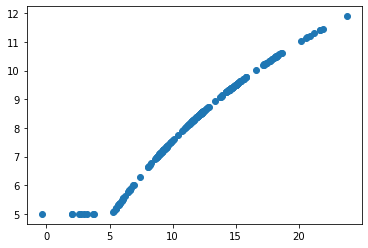

In [5]:
K = 1
n = 0.9
cutoff = 5

gpm = MountFujiSimulation.from_length(8, roughness_width=0.5, field_strength=3)

norm = (gpm.phenotypes - np.min(gpm.phenotypes))/(np.max(gpm.phenotypes) - np.min(gpm.phenotypes))


transformed = np.max(gpm.phenotypes)*(norm*K)**n/(1 + (norm*K)**n)
transformed[transformed < cutoff] = cutoff

gpm._phenotypes = transformed

plt.plot(gpm.phenotypes,transformed,'o')
plt.show()



### Write output

In [6]:

def write_pretty_csv(gpm,csv_name):
    """
    Write a csv without all the typical pandas or gpmap
    gobblygook. """
    
    df = pd.DataFrame({"genotypes":gpm.data["genotypes"],
                       "phenotypes":gpm.data["phenotypes"]})
    df.to_csv(csv_name,index=False)


# Split dataset
train, test = split_gpm(gpm, fraction=0.5)

# write csv files
write_pretty_csv(gpm,'example-full.csv')
write_pretty_csv(train,'example-train.csv')
write_pretty_csv(test,'example-test.csv')